
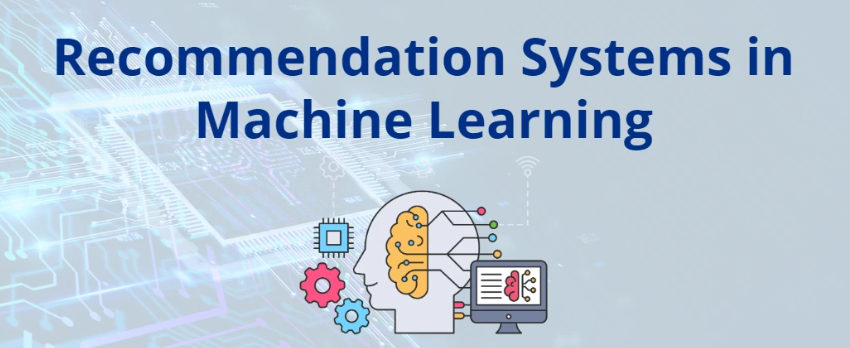

# **Netflix Recommendation Engine**

**What are Recommender Systems?**

Recommender systems are algorithms designed to suggest relevant items to users. These systems are used in various domains such as e-commerce, streaming services, and social media. They enhance user experience by filtering vast amounts of information to deliver personalized content.

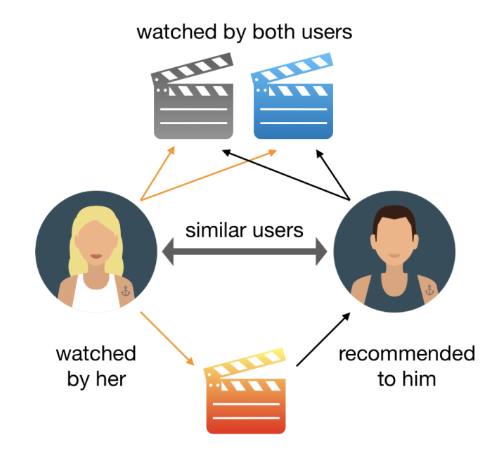

#SVD (Singular Value Decomposition) in a recommendation system works by finding patterns in user preferences and item similarities.

Here's a basic idea without going deep into the topic

**1) What the System Has: A big table (matrix) with users on one side and items (like movies) on the other. Users give ratings to items, but not everyone has rated everything**

**2) What SVD Does: SVD looks at the ratings that are available and tries to figure out the hidden connections between users and items. It learns what kind of movies users like based on their previous ratings**

**3) How It Helps: Once SVD understands these patterns, it can predict how a user might rate a movie they haven’t seen yet. Based on these predictions, the system recommends movies that the user is most likely to enjoy**

**In simple terms:**

**Think of SVD as a way to summarize the information in a matrix by identifying its key components.**

**It reduces a high-dimensional matrix into smaller dimensions while preserving the most important patterns in the data.**

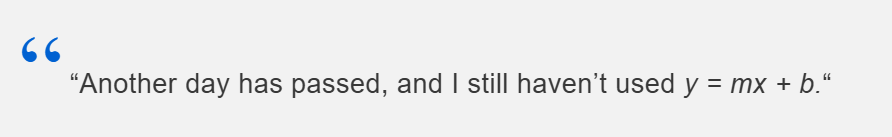

# How Does SVD Work?

**Imagine you have a big dataset in the form of a matrix. The goal of SVD is to represent this matrix as the product of three simpler matrices:**

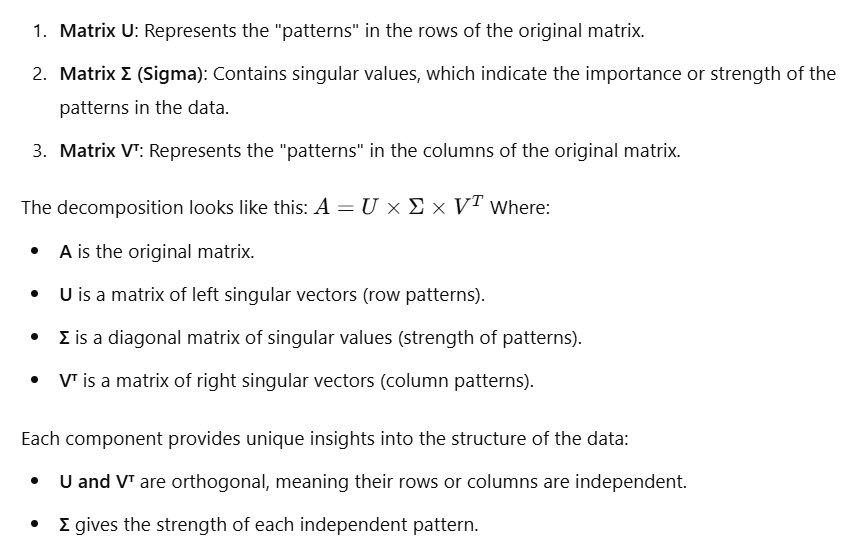

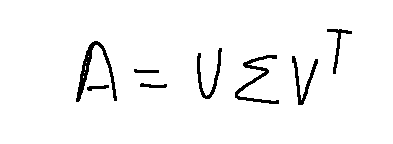

# Step-by-Step Intuition

Let’s use an example of movie ratings to break it down:

Input Matrix: Imagine you have a matrix of users and their ratings for movies. Each cell represents how much a user liked a movie.

**Decomposition:**

U: Groups users into patterns based on their rating preferences (e.g., users who like action movies).

Σ: Identifies how strong or dominant each pattern is (e.g., how many users follow a particular preference).

Vᵀ: Groups movies into patterns based on the ratings they received (e.g., movies in the action genre are liked by similar users).

**Reconstruction:**

 By multiplying U, Σ, and Vᵀ, you can recreate the original matrix. However, you can also keep only the top patterns (largest singular values in Σ) to reduce noise and focus on the most important information.

**Example : Samll recommnedation system with SVD**

In [1]:
# Lets crreta  a matrix of ratix
'''            Movie A    Movie B   Movie C
User id   U1      5         4         1
          U2      3         2         1
          U3      4         3         1
'''
# Convert this data to a matrix ( A )

A=[[5,4,1],
 [3,2,1],
  [4,3,1]]
print(A)

[[5, 4, 1], [3, 2, 1], [4, 3, 1]]


In [2]:
# Apply SVD
import numpy as np
'''
U= User features
S= Singular values
VT= Movie features
'''
U , S , VT = np.linalg.svd(A)

In [3]:
print(U)

[[-0.71603821  0.56623547 -0.40824829]
 [-0.41158755 -0.8148184  -0.40824829]
 [-0.56381288 -0.12429146  0.81649658]]


In [4]:
print(S)

[9.04322382e+00 4.69151353e-01 6.27319750e-17]


In [5]:
print(VT)

[[-0.78182354 -0.5947842  -0.18703934]
 [-0.2354116   0.55937325 -0.79478485]
 [-0.57735027  0.57735027  0.57735027]]


In [6]:
# Re-construction ( To reduce the noise i will use top 2 sigular values)
S_K= np.diag(S[:2])
U_K= U[ :, :2]
VT_K = VT[:2,:]

In [7]:
A_pred = np.dot(np.dot(U_K , S_K) ,VT_K)

In [8]:
print(A_pred)

[[5. 4. 1.]
 [3. 2. 1.]
 [4. 3. 1.]]


# Advantages of SVD

**Dimensionality Reduction:**

SVD reduces the size of the data while retaining the most significant information.

This is useful in tasks like Principal Component Analysis (PCA).

**Noise Reduction:**

By keeping only the dominant singular values, SVD removes insignificant data or noise.

**Efficient Computation:**

Works well with sparse datasets (e.g., in recommendation systems).

**Improved Performance:**

In machine learning, SVD helps simplify datasets, which improves model performance and reduces overfitting.


In [9]:
!pip uninstall -y numpy                              # Uninstall the current version of Numpy
!pip install numpy==1.26.4                           # Install numpy version 1.26.4
!pip install scikit-surprise --prefer-binary         # Install surprise library now

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 65.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
rasterio 1.5.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
pytensor 2.36.3 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
^C


In [1]:
import pandas as pd
# Dont import numpy now because we have already installed numpy verision 1.26.4
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Drive mounnt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')   # Once your colab is connected to google drive

Mounted at /content/drive


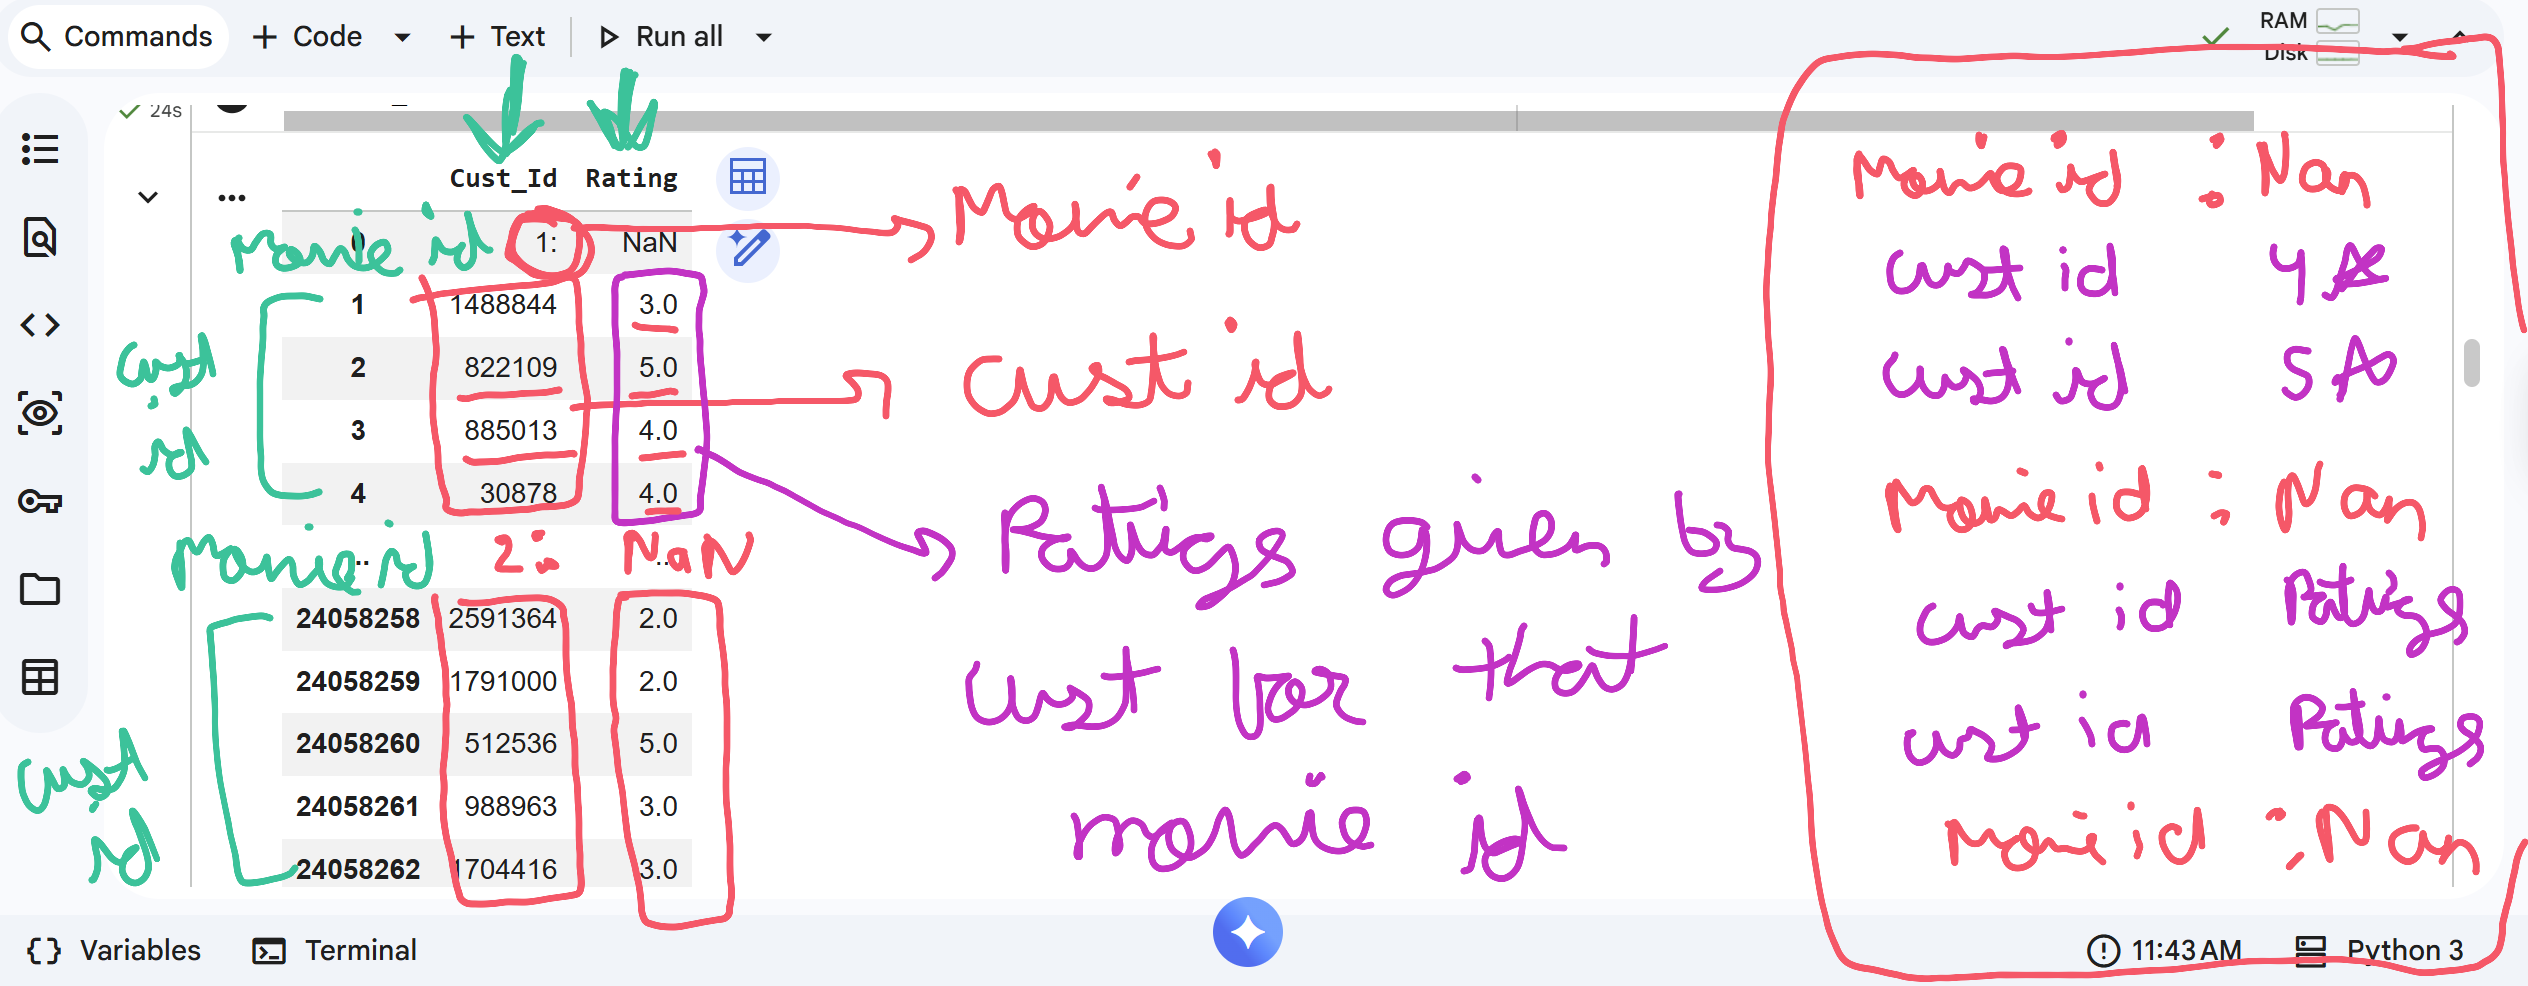

In [3]:
# Reading dataset file having 2 crore 40 lakh 58 thousand records

netflix_dataset = pd.read_csv('/content/drive/MyDrive/Dataset/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [5]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [6]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


# Finding the movie count by assumiung that if there is NaN in Rating column so in front of it , there is a movie id

In [7]:
#get the movie count ( as the NaN values in Rating column will show how many movie are there )
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]
movie_count

4499

# Finding the total unqiue customer id by substracting the movie count from uniuque values in cust id column

In [8]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [9]:
customer_count

475257

In [10]:
customer_count - movie_count  # Total number of customers that we have after removing movie id from the column

470758

**we have totak 4 lakh , 70 thousand and 7 hundred 58 unique customeras**

In [11]:
#get the total number of ratings given by the customers to all movies combined

rating_count=netflix_dataset['Cust_Id'].count()-movie_count  # In Customer id column we will remove movie id to get how many total rating are there
rating_count

24053764

In [12]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [13]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


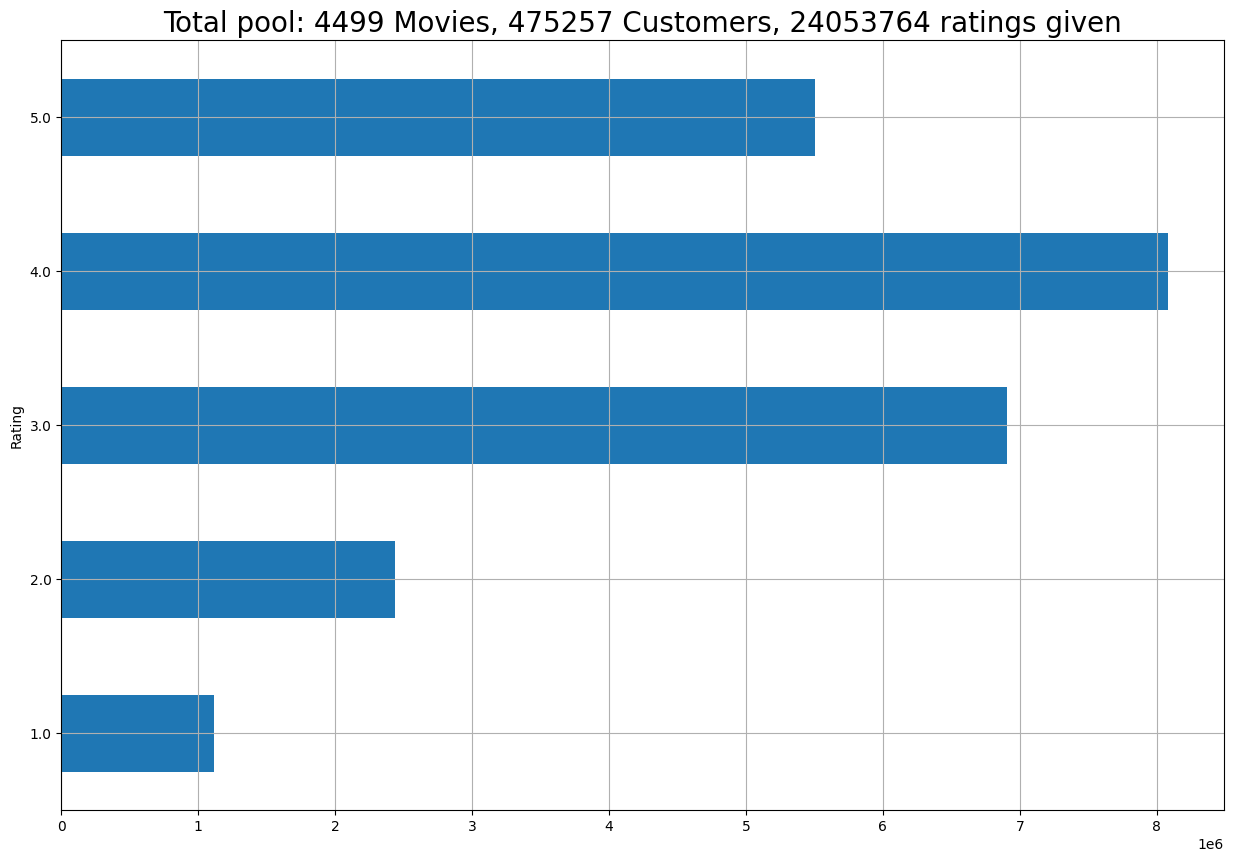

In [14]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))

plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [15]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [16]:
# Lets just make a clear dataframe to find how many MovieId are there
movie_id=None
movie_np =[]
# Iterate over the DataFrame rows
for cust_id in netflix_dataset['Cust_Id']:
    if ':' in cust_id:
      # Update the current movie ID
      movie_id = int(cust_id.replace(':', ''))
    movie_np.append(movie_id)

In [17]:
movie_np  # Movie id columns that we can add in our dataset

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [18]:
# Add the new column to the DataFrame
netflix_dataset['Movie_Id'] = movie_np

In [19]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [20]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]
# to keep only the rows where the 'Rating' column is not null (i.e., it excludes rows where the 'Rating' is NaN)

In [21]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [22]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [23]:
# Now we dont hav movie if in cust id column we have removed all 1:Nan , 2:Nan so lets fix the data type now
netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)

/tmp/ipython-input-280181150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)


In [24]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [25]:
#pre-filtering
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers

In [26]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [27]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [28]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [29]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list  # In this lst all movies are there those are having less rating then bencmarsk so reove them

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [30]:
len(drop_movie_list)

2699

In [31]:
4499-2699  #movies left

1800

In [32]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [33]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [34]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [35]:
len(drop_cust_list)

282042

# Lets remove all movies that has been rated less than 908 times

# Lets remove all customers that have rated less than 36 movies

In [36]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


In [37]:
netflix_dataset  # Clean netflix data !!!!!!!!

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [38]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19695836 entries, 696 to 24056846
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 601.1 MB


# **Model Building**

In [39]:
df_title = pd.read_csv("/content/drive/MyDrive/Dataset/movie_titles.csv",   encoding='latin',header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

In [40]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [41]:
# Install numpy
!pip install surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2554966 sha256=b560ba2c6d21d1f664d871a7d62209e2fa20ee0a99df879f6e5aefc6f1fcfe0b
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [42]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [43]:
reader=Reader()

In [44]:
#we only work with top 100K rows for quick runtime
data=  Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [45]:
model=SVD()  # Creating a SVD model

In [46]:
cross_validate(model, data, measures=['RMSE'], cv=3)  # Trained the model

{'test_rmse': array([1.0229247 , 1.02258254, 1.01498436]),
 'fit_time': (1.478600263595581, 2.406147003173828, 4.073103904724121),
 'test_time': (0.16388678550720215, 0.4343400001525879, 1.6334483623504639)}

# **Use model for making Recommendation for a specific user**

In [47]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [48]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [49]:
# Filter the dataset for the specific user you have selected to make recokmnedation to that user
user_ratings = netflix_dataset[netflix_dataset['Cust_Id'] == 1331154]
user_ratings

,Cust_Id,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [50]:
# Find the number of unique movies rated by the user
movies_rated_by_user = user_ratings['Movie_Id'].nunique()

print(f"User 1331154 has rated {movies_rated_by_user} unique movies.")

User 1331154 has rated 253 unique movies.


In [51]:
copy_data_for_user = df_title.copy()   #making a copy for each individual customer for the recomendation
copy_data_for_user

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [52]:
CLEAN_copy_data_for_user = copy_data_for_user[~copy_data_for_user['Movie_Id'].isin(drop_movie_list)]
CLEAN_copy_data_for_user   # Removing the movie les then benchmark for this user

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [64]:
CLEAN_copy_data_for_user['Estimate_Score']=CLEAN_copy_data_for_user['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
# predict the score (rating) that a user (with user ID 1331154) might give to a list of movies.

/tmp/ipython-input-1091736127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CLEAN_copy_data_for_user['Estimate_Score']=CLEAN_copy_data_for_user['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [65]:
CLEAN_copy_data_for_user

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.496010
4,5,2004.0,The Rise and Fall of ECW,4.045267
5,6,1997.0,Sick,3.441150
7,8,2004.0,What the #$*! Do We Know!?,3.348919
15,16,1996.0,Screamers,2.809545
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.499450
17766,17767,2004.0,Fidel Castro: American Experience,3.499450
17767,17768,2000.0,Epoch,3.499450
17768,17769,2003.0,The Company,3.499450


In [66]:
CLEAN_copy_data_for_user.sort_values('Estimate_Score', ascending=False) # Descending order estimated score

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,4.045267
17,18,1994.0,Immortal Beloved,3.697127
27,28,2002.0,Lilo and Stitch,3.593295
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.589559
10234,10235,2000.0,Teen Spirit: A Tribute to Kurt Cobain,3.499450
...,...,...,...,...
7,8,2004.0,What the #$*! Do We Know!?,3.348919
23,24,1981.0,My Bloody Valentine,3.016054
15,16,1996.0,Screamers,2.809545
16,17,2005.0,7 Seconds,2.748622


In [56]:
top5_movies=CLEAN_copy_data_for_user.sort_values('Estimate_Score', ascending=False).head(5)

In [57]:
top5_movies

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,4.045267
17,18,1994.0,Immortal Beloved,3.697127
27,28,2002.0,Lilo and Stitch,3.593295
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.589559
10234,10235,2000.0,Teen Spirit: A Tribute to Kurt Cobain,3.499450
